# Mortgage Delinquencies
Predicting which loans will become delinquent (late payment).

### Table of Contents
   - [Objective](#objective)
   - [Data](#data)
       - [Exploratory Data Analysis](#eda)
   - [Model](#model)
       - [Build & Trian](#bnt)
       - [Validation](#validate)
   - [Result](#result)

## <a id="objective">Objective</a>
Predicting which loans will become delinquent (late payment).

## <a id="data">Data</a>
Data source: Fannie Mae's purchased Mortgages performance of 2018.

### <a id="eda">Exploratory Data Analysis</a>

#### Import Libraries

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from codes.preprocess import *
from codes.model import *
from codes.fig_generate import *

# Seaborn Setting
sns.set(style="white", context='talk')
sns.set_palette('dark')

Please download the data from [Fannie Mae](https://www.fanniemae.com/portal/funding-the-market/data/loan-performance-data.html). <br>
Then unzip individual files and move them into a "data" folder to use the function "preprocess" in "preprocess" file of "codes" folder.<br>
Cleaned [Test]() and [Train]() Data is included in "data" folder.

#### Preprocess data
Can run the follow line of code when the data is downloaded. 
And only txt files for Aquisition and Performance are in the data.
This code will read the txt files, preprocess them, 
and save a "cleaned_train_data.csv.zip" and "cleaned_test_data.csv.zip" files.

"""# change this cell to 'code" only when needed to create cleaned data"""
preprocess()  

### Descriptive Summary:

In [18]:
df = load_clean_data('data/cleaned__data.csv.zip',full=True)
df.delinquency_bool = df.delinquency_bool.apply(lambda x: 'Delinquent' if x else 'Current')
display(df.head(3))
df.info()

,id,org_balance,interest_rate,ltv,borrower_count,score,loan_purpose,dti,occupancy_type,property_type,upc_balance,loan_age,months_to_maturity,payment_amounts,delinquency_bool
0,348182948687,64000,5.25,47,2,728.0,C,30.0,I,SF,62412.40,12,348,163.49,Current
1,762436040449,408000,4.25,80,2,750.5,P,33.0,P,SF,402288.47,10,350,580.28,Current
2,996311929665,105000,4.25,75,1,809.0,R,29.0,P,PU,88885.01,16,164,1469.89,Current


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608153 entries, 0 to 1608152
Data columns (total 15 columns):
id                    1608153 non-null int64
org_balance           1608153 non-null int64
interest_rate         1608153 non-null float64
ltv                   1608153 non-null int64
borrower_count        1608153 non-null int64
score                 1608153 non-null float64
loan_purpose          1608153 non-null object
dti                   1608153 non-null float64
occupancy_type        1608153 non-null object
property_type         1608153 non-null object
upc_balance           1608153 non-null float64
loan_age              1608153 non-null int64
months_to_maturity    1608153 non-null int64
payment_amounts       1608153 non-null float64
delinquency_bool      1608153 non-null object
dtypes: float64(5), int64(6), object(4)
memory usage: 184.0+ MB


In [3]:
# Feature Columns and x-axis labels
Features = {
    'score': 'Borrower Credit Score',
    'interest_rate': 'Interest rate',
    'ltv': 'Loan to Value',
    'loan_age': 'Loan Age',
    'dti': 'Debt to Income ratio',
    'upc_balance': 'Unpaid balance amount',
    'loan_purpose': 'Loan purpose',
    'org_balance': 'Original Balance',
    'borrower_count': 'Borrower Count',
    'occupancy_type': 'Occupancy Type',
    'months_to_maturity': 'Months to Maturity',
    'payment_amounts': 'Payment Amounts'
    }

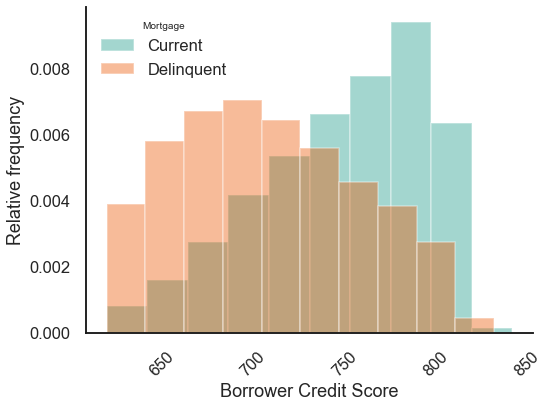

In [4]:
fig = plt.figure(figsize=(8,6))
distplot('score', data=df, xlabel=Features['score'], ylabel='Relative frequency',
         plt_title='figures/CreditScore_DistPlot', legend_title="Mortgage")

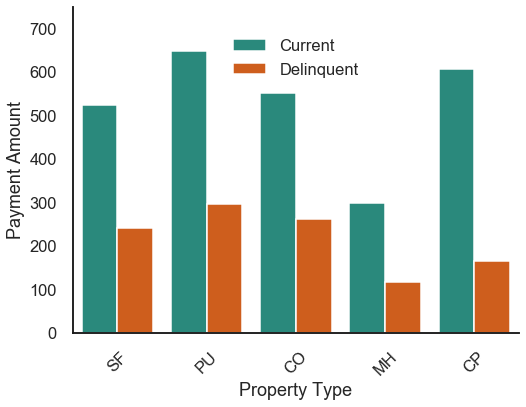

In [5]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

sns.barplot(x='property_type',y='payment_amounts',hue='delinquency_bool', 
            palette=['#1a9988', '#eb5600'], ci=None,
            data=df, 
            capsize=0.1)
ax.legend(['Current','Delinquent'],loc=1)
ax.set_ylim([0, 750])
ax_params(xlabel='Property Type', ylabel='Payment Amount', legend_title=' ',
          plt_title='figures/PropertyType_v_Payment')

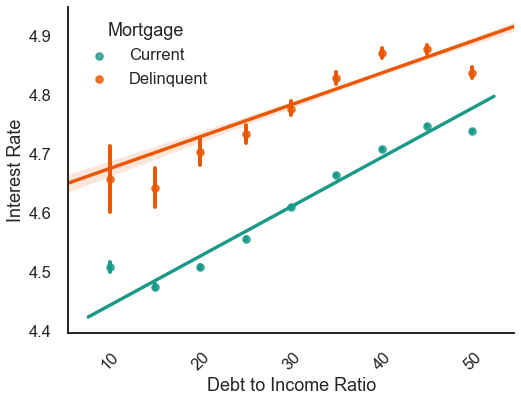

In [51]:
fig = plt.figure(figsize=(8,6))
for b,h,t in [(0,'#1a9988','Current'),(1,'#eb5600','Delinquent')]:
    sns.regplot(x='dti',y='interest_rate', 
            data=df[df.delinquency_bool==t], 
            label = t,x_bins = [10, 15, 20, 25, 30, 35, 40, 45, 50],
            color=h, x_estimator=np.mean, scatter_kws={'alpha':0.8})
ax_params(xlabel='Debt to Income Ratio', ylabel='Interest Rate',
          plt_title="figures/DBT_vs_Interest", legend_title=' ')

In [8]:
df.loan_age.describe()

count    1.608153e+06
mean     1.384594e+01
std      4.227617e+00
min      1.000000e+00
25%      1.100000e+01
50%      1.400000e+01
75%      1.700000e+01
max      8.100000e+01
Name: loan_age, dtype: float64

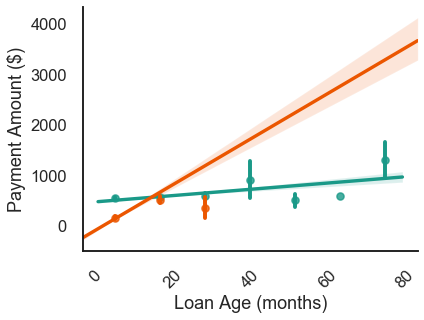

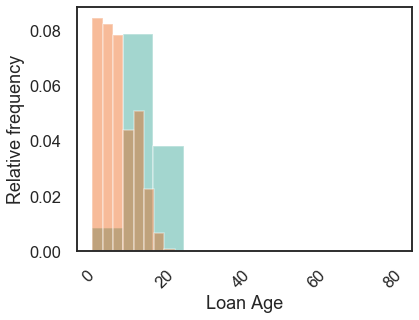

In [19]:
fig, plt.figure(figsize=(6,6*0.75))
for b,h,t in [(0,'#1a9988','Current'),(1,'#eb5600','Delinquent')]:
    sns.regplot(x='loan_age',y='payment_amounts', 
            data=df[df.delinquency_bool==t], 
            label = t, x_bins = np.linspace(5,75,7),
            color=h, x_estimator=np.mean, scatter_kws={'alpha':0.8})
ax_params(xlabel='Loan Age (months)', ylabel='Payment Amount ($)',
          plt_title="figures/DBT_vs_Interest")
plt.show()
fig, plt.figure(figsize=(6,6*0.75))
distplot('loan_age', data=df, xlabel=Features['loan_age'], ylabel='Relative frequency', 
         ax=ax[1], plt_title='figures/CreditScore_DistPlot')
plt.show()

## <a id="model">Model</a>

### <a id="bnt">Build and Train</a>

#### Load Trian Data

In [20]:
X_train, y_train = load_clean_data('data/cleaned_train_data.csv.zip', full=True)

Create an undersampling of the majority class (Current Mortgages) to train our model on.

In [21]:
df = pd.concat([X_train,y_train],axis=1)
df = pd.concat([df[df.delinquency_bool==1],
                df[df.delinquency_bool==0].sample(n=y_train.sum(), random_state=42)],axis=0)
X_train = df.drop(columns=['delinquency_bool'])
y_train = df.delinquency_bool

**Through searching for the best classification algorithm using 'accuracy', we found that stochastic gradient descent (SGD) learning algorithm gave us the best.**

In [22]:
preprocessor = build_transformers(X_train)
sgb_pipe = Pipeline([
     ('prep', preprocessor),
     ('clf', SGDClassifier(loss='hinge', random_state=42))
], memory='cached_transformers')
sgb_pipe.fit(X_train,y_train)

/Users/jleifnf/Library/Python/3.7/lib/python/site-packages/imblearn/pipeline.py:242: UserWarning: Persisting input arguments took 0.85s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name]


Pipeline(memory='cached_transformers',
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['org_balance',
                                                   'interest_rate', 'ltv',
                                   

### <a id="validate">Validation</a>

In [23]:
X_test,y_test = load_clean_data('data/cleaned_test_data.csv.zip', full=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/jleifnf/Library/Python/3.7/lib/python/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


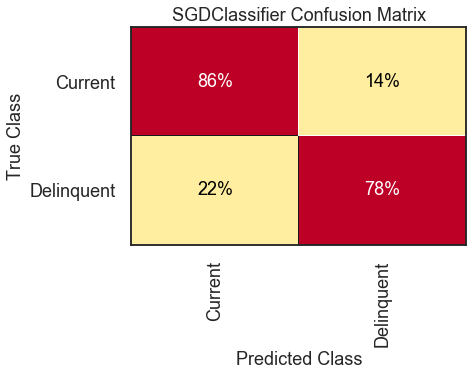

[[437609  73062]
 [  4376  15644]]
              precision    recall  f1-score   support

     Current     0.9901    0.8569    0.9187    510671
  Delinquent     0.1764    0.7814    0.2878     20020

    accuracy                         0.8541    530691
   macro avg     0.5832    0.8192    0.6032    530691
weighted avg     0.9594    0.8541    0.8949    530691



In [24]:
CM(sgb_pipe, X_test, y_test)

## <a id="result">Result</a>

**Accuracy**<br>
- Base Models:
    - LogisticRegression: 0.8335
    - RandomForest: 0.8497
    - GradientBoostingClassifier: 0.8504
    - SGDClassifier(‘log’): 0.8172
    - SGDClassifier(‘hinge’): **0.8541**
    - SVC: 0.8531
- Best Models?
    - LogisticRegression: 0.8335
    - RandomForest: 0.8496
    - GradientBoostingClassifier: 0.8435
    - SGDClassifier(‘hinge’): ?

#### For a borrower, our model can predict with **85%** accuracy whether the mortgage will likely to be Current or Delinquent with the next payment.
